In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
data=pd.read_csv('/content/loan dataset.csv')
data=pd.DataFrame(data)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


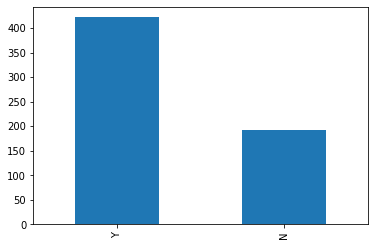

In [ ]:
data['Loan_Status'].value_counts()
data['Loan_Status'].value_counts().plot.bar()

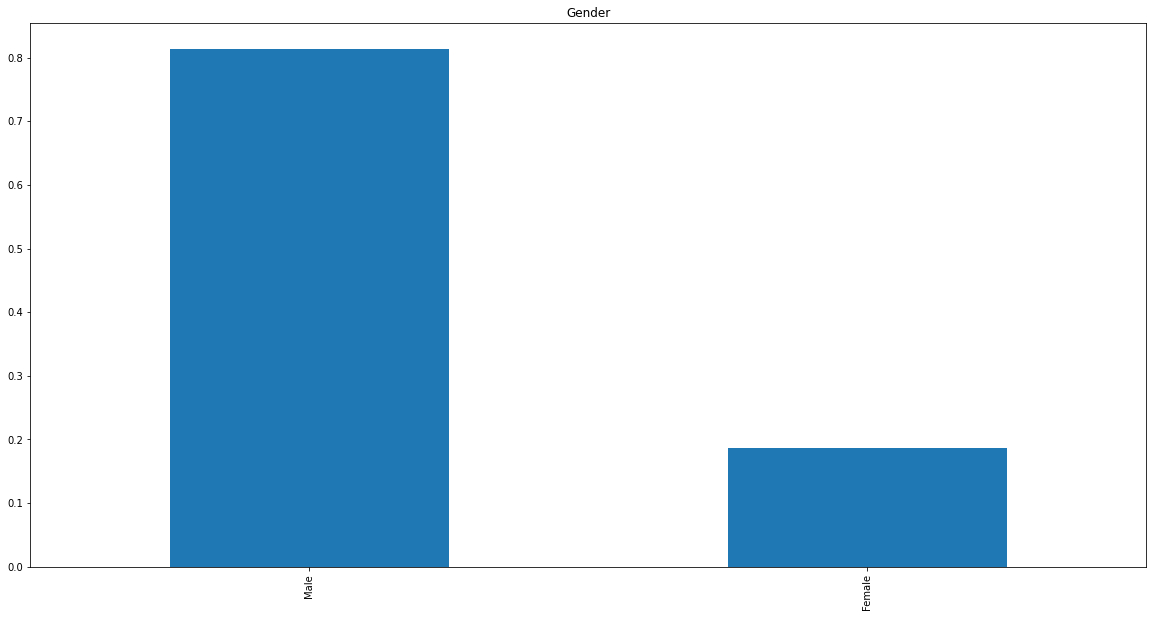

In [ ]:
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.show()


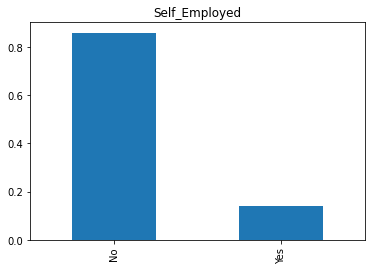

In [ ]:
data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()


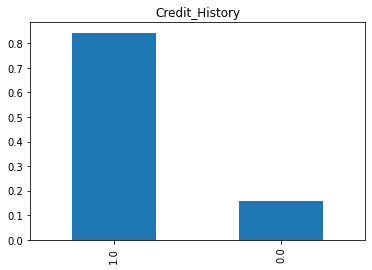

In [ ]:
data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

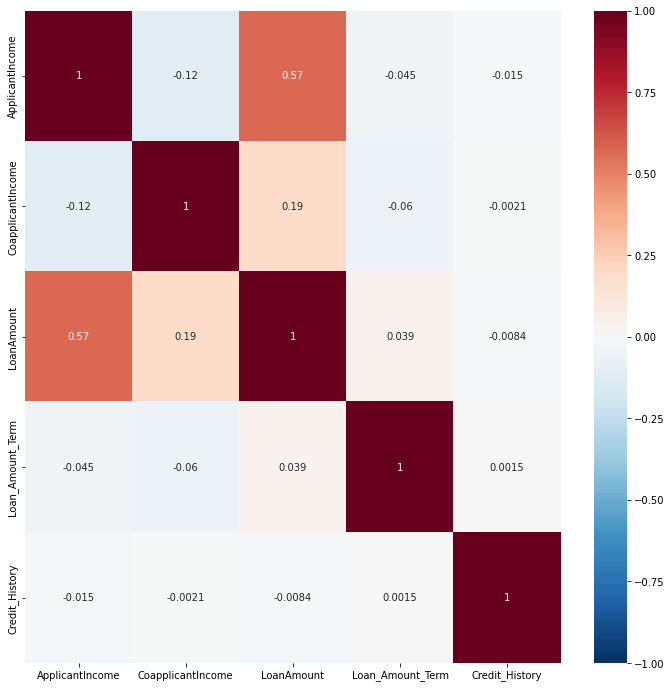

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), vmin=-1.0,center=0,cmap='RdBu_r',annot=True,data=data)
plt.show()

In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [ ]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [ ]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data=data.drop('Loan_ID',axis=1)
data= data.apply(LabelEncoder().fit_transform)
X = data.drop(['Loan_Status'],axis=1)
y = data.Loan_Status

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,376,0,81,8,1,2
1,1,1,1,0,0,306,60,81,8,1,0
2,1,1,0,0,1,139,0,26,8,1,2
3,1,1,0,1,0,90,160,73,8,1,2
4,1,0,0,0,0,381,0,94,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0,29,8,1,0
610,1,1,3,0,0,275,0,7,5,1,0
611,1,1,1,0,0,431,3,162,8,1,2
612,1,1,2,0,0,422,0,132,8,1,2


In [ ]:
y


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
X.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
X['Loan_Amount_Term'].fillna(X['Loan_Amount_Term'].mode()[0], inplace=True)
X['LoanAmount'].fillna(X['LoanAmount'].median(), inplace=True)
X['Credit_History'].fillna(X['Credit_History'].mode()[0], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr=lr.score(x_test,y_test)
lr

0.1581534042626993

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf=rf.score(x_test,y_test)
rf

0.7235772357723578

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt=dt.score(x_test,y_test)
dt

0.6910569105691057

In [ ]:
#svm
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
svm=svm.score(x_test,y_test)
svm

0.6260162601626016

In [ ]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb=nb.score(x_test,y_test)
nb

0.7317073170731707

In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(13)
knn.fit(x_train,y_train)
knn=knn.score(x_test,y_test)
knn

0.6097560975609756

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'SVM',
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [lr,knn,svm,rf,nb,dt]})

In [ ]:
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Naive Bayes,0.731707
3,Random Forest,0.723577
5,Decision Tree,0.691057
2,SVM,0.626016
1,KNN,0.609756
0,Linear Regression,0.158153


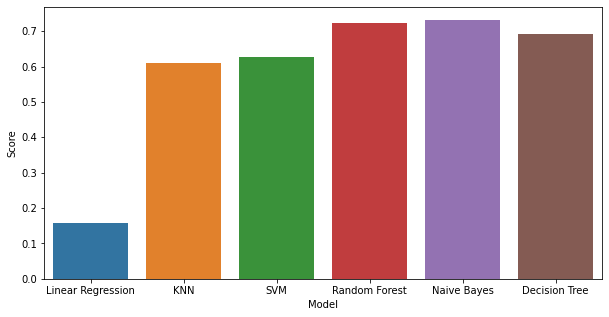

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model',y='Score',data=models)
plt.show()